## In this file of code, we are writing two programs using probability theory: 
<ul>
<li> The first one will predict the country's cuisine from the list of ingredients of users input, using probablity.</li>
<li> The second one will determine if the ingredient is unique to only one culture or not.</li>
</ul>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb 
from collections import Counter 
from itertools import chain, combinations
data = pd.read_json("train.json")
data.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

## We will use the paragraph of code that are used in our part 1 - exploratory analysis to evaluate the percentage of different ingredients in different cuisine

More detailed information about the code is shown in each comment line

In [2]:

single_cuisines = data.cuisine.unique()

n_single_cuisines = len(single_cuisines) #20 #single_cusines mean country

counted_ingredients = Counter(chain.from_iterable(data.ingredients.tolist())) # Builds a counter to count the occurences of each ingredient
single_ingredients = list(counted_ingredients.keys()) # Builds a list will all single ingredients
n_single_ingredients = len(single_ingredients) # Counts the number of single ingredients - 6714

specific_ingredients = {} 
sorted_ingredients = {} 
sorted_not_specific_ingredients = {}
not_specific_ingredients = single_ingredients # it is list of single ingredient. This list will be subtracted gradually after each cusine, substracted by the list of the specific ingredients in that country

for cuisine in single_cuisines : #for each country - Eg. Vietnam
    sorted_ingredients[cuisine] = Counter(chain.from_iterable(data[data.cuisine == cuisine].ingredients.tolist())) #get/count all of the rows that contains the cuisine of Vietnam
    other_cuisines_ingredients = Counter(chain.from_iterable(data[data.cuisine != cuisine].ingredients.tolist())) #get/count all of the rows that does not come from this Vietnamese cuisine
    intersection  = Counter(sorted_ingredients[cuisine]) & Counter(other_cuisines_ingredients) #find the intersection of the ingredients between the Vietnamese cuisine and other region cuisine - that means find the list of ingredients that are not unique
    specific_ingredients[cuisine] = list(sorted_ingredients[cuisine] - intersection) #find and list the unique ingredients of the Vietnamese cuisine, after substracting the common ingredients from the overall list of ingredients of Vietnam
    not_specific_ingredients = list(Counter(not_specific_ingredients) - Counter(specific_ingredients[cuisine])) #list and count the list of common ingredients (used by 2 or more countries) in Vietnam, aftr substracting the specific ingredient in Vietnam from a list of single ingredient.#This is the total list of the common ingredients, which will be gradually substracted after each cuisine is runned through.
    sorted_not_specific_ingredients[cuisine] = list(sorted_ingredients[cuisine] - Counter(specific_ingredients[cuisine])) #the list of common ingredients that are only used by VietNam.
    # Print info about current cuisine
    print(cuisine + " cuisine has " + str(len(specific_ingredients[cuisine])) + " specific ingredients and uses "+ str(len(sorted_ingredients[cuisine])) + "  different ingredients")
 
sum_specific_ingredients = sum(len(v) for v in specific_ingredients.values()) #calculate the sum of the specific ingredients in every country/culture
sum_not_specific_ingredients = len(not_specific_ingredients) #calculate the sum of ingredients that are used by 2 or more countries

print("\n" + str(sum_specific_ingredients) + " ingredients are specific to one cuisine and \n" + str(sum_not_specific_ingredients)+" ingredients are not specific to one cuisine")
recipe_by_cuisine = data.groupby('cuisine').cuisine.count().to_dict() #How many cuisines of Vietnam in this Dataset? How many cusines of China in this DataSet?

greek cuisine has 86 specific ingredients and uses 1198  different ingredients
southern_us cuisine has 446 specific ingredients and uses 2462  different ingredients
filipino cuisine has 78 specific ingredients and uses 947  different ingredients
indian cuisine has 270 specific ingredients and uses 1664  different ingredients
jamaican cuisine has 42 specific ingredients and uses 877  different ingredients
spanish cuisine has 64 specific ingredients and uses 1263  different ingredients
italian cuisine has 852 specific ingredients and uses 2929  different ingredients
mexican cuisine has 716 specific ingredients and uses 2684  different ingredients
chinese cuisine has 317 specific ingredients and uses 1792  different ingredients
british cuisine has 110 specific ingredients and uses 1166  different ingredients
thai cuisine has 121 specific ingredients and uses 1376  different ingredients
vietnamese cuisine has 65 specific ingredients and uses 1108  different ingredients
cajun_creole cuisine

### Test our above function for listing the specific ingredients in vietnam

In [3]:
specific_ingredients["vietnamese"]

['rice paper',
 'vermicelli noodles',
 'pickled carrots',
 'rice vermicelli',
 'asian basil',
 'Vietnamese coriander',
 'perilla',
 'coconut juice',
 'banana blossom',
 'bawang goreng',
 'toasted nuts',
 'yellow rock sugar',
 'dried wood ear mushrooms',
 'pork roll',
 'roast pork seasoning mix',
 'banh hoi',
 'tri tip',
 'nuoc mam',
 'thin rice stick noodles',
 'vietnamese fish sauce',
 'ground coffee',
 'opo squash',
 'Conimex Wok Olie',
 'Conimex Woksaus Specials Vietnamese Gember Knoflook',
 'anise basil',
 'rice paddy herb',
 'hero rolls',
 'Italian basil',
 'nuoc cham',
 'mo hanh',
 'balm',
 'banh pho rice noodles',
 'nuoc nam',
 'vietnamese rice paper',
 'eye of the round',
 'shrimp chips',
 'granulated tapioca',
 'wish-bone light asian sesame ginger vinaigrette dressing',
 'asian chili red sauc',
 'dragon fruit',
 'fine egg noodles',
 'pâté',
 'long buns',
 'cinnamon candy canes',
 'small yellow onion',
 'asian',
 'balm leaves',
 'hubbard squash',
 'low-fat sweetened condensed m

### Create a dataframe with columns are name of 20 cultures. All the data is 0.

In [4]:
DF_score = pd.DataFrame({'ingredient_name': single_ingredients}) #create a dataframe with only column with the name of every ingredients
DF_matrix = pd.DataFrame(np.zeros((n_single_ingredients, n_single_cuisines), dtype = 'int'), columns=single_cuisines) #create a dataframe with columns = 20 cultures. All the data is 0.
DF_score = pd.concat([DF_score,DF_matrix], axis=1)

DF_score.head()

,ingredient_name,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,...,thai,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian
0,romaine lettuce,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,black olives,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,grape tomatoes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,garlic,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,pepper,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now we will fill the probability coefficients:

In [5]:

for cuisine in single_cuisines : #for each culture or country.e.g: Vietnam
    for ingredient in sorted_not_specific_ingredients[cuisine]: #for each ingredient in the list of common ingredient that are used by VietNam
        DF_score.loc[DF_score['ingredient_name'] == ingredient, cuisine] = sorted_ingredients[cuisine][ingredient]/recipe_by_cuisine[cuisine] # Pounded by the number of reciepe by cuisine
    for ingredient in specific_ingredients[cuisine]:
        DF_score.loc[DF_score['ingredient_name'] == ingredient, cuisine] = 100*sorted_ingredients[cuisine][ingredient]/recipe_by_cuisine[cuisine] # Ingredients that are specific to one cuisine increase the probability of the dish of being of this cuisine
DF_score.head()


,ingredient_name,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,...,thai,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian
0,romaine lettuce,0.033191,0.001852,0.000000,0.000999,0.000000,0.004044,0.004210,0.015999,0.004863,...,0.012995,0.020606,0.007762,0.000000,0.004535,0.000000,0.001499,0.006024,0.000000,0.000000
1,black olives,0.026383,0.000694,0.000000,0.000000,0.000000,0.004044,0.008548,0.014290,0.000000,...,0.000000,0.000000,0.001294,0.000000,0.007937,0.000000,0.000000,0.000000,0.009744,0.002045
2,grape tomatoes,0.022128,0.003241,0.001325,0.001665,0.000000,0.006067,0.012503,0.008232,0.000748,...,0.002599,0.000000,0.003234,0.000000,0.004913,0.000703,0.000000,0.000000,0.000000,0.000000
3,garlic,0.183830,0.059954,0.430464,0.241758,0.264259,0.129424,0.187675,0.204567,0.285447,...,0.269006,0.289697,0.239327,0.175589,0.080877,0.116655,0.076462,0.365060,0.174178,0.040900
4,pepper,0.172766,0.127083,0.263576,0.068265,0.237643,0.134479,0.123118,0.125194,0.059110,...,0.052632,0.086061,0.122251,0.119914,0.078987,0.043570,0.130435,0.119277,0.114495,0.120654


### Now we create some functions that takes the sum of all the ingredients' probabilty in each culture, and return the culture with the highest sum of probability

In [6]:
def evaluate_cuisine_score(ing_list): #This function is to sum all of the score of each cuisine of each ingredient.
    score = dict.fromkeys(single_cuisines,0)
    for ing in ing_list:
        for cuisine in single_cuisines:
            if not DF_score.loc[DF_score['ingredient_name'] == ing, cuisine].empty: # Check that dataset is not empty
                score[cuisine] += DF_score.loc[DF_score['ingredient_name'] == ing, cuisine].item()
    return score

In [7]:
def find_cuisine_from_score(score): 
    return [key for m in [max(score.values())] for key,val in score.items() if val == m] # list containing the keys of the highest values of the score dict

# 3.3 Function which finds the possible cusisines of an ingredient list
def find_cuisine(ing_list):
    return find_cuisine_from_score(evaluate_cuisine_score(ing_list))

### Make a test with the first cuisine on the train dataset, which is a Greek cuisine

The cuisine of the above ingredients is from: ['greek']


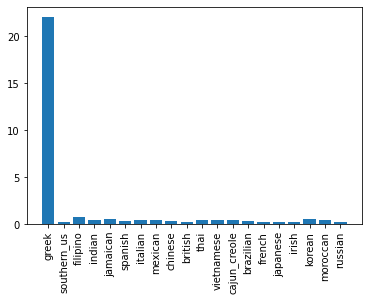

In [8]:
import matplotlib.pyplot as plt
ing_list = ['romaine lettuce','black olives','grape tomatoes','garlic','pepper','purple onion','seasoning','garbanzo beans','feta cheese crumbles']
D = evaluate_cuisine_score(ing_list)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
print ("The cuisine of the above ingredients is from:" ,find_cuisine(ing_list))

##### The above cell has returned exactly what we want. The bar plot represents the probability of the given list of ingredients being in different cultures, from which we can see Greek dominates the others. Now we will write some lines of codes to take the input and print out the result.


# This is our program predicting the name of the cuisine, taking input from user:

### Please input a list of ingredients separated by a comma, please <b> don't </b> include any <b> quotation mark </b> or space <br><br>Example of valid input:plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil

Fill in a list of ingredients, separated by just a comma, please don't include any quotation mark: plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil

 The cuisine of the above ingredients is from: ['southern_us']


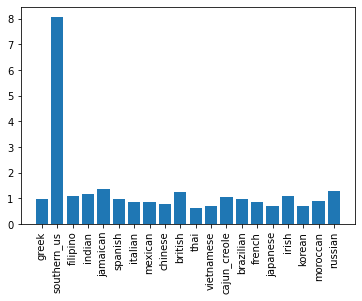

In [15]:
input_ingredient = input("Fill in a list of ingredients, separated by just a comma, please don't include any quotation mark: ")
list_of_input_ingredient = input_ingredient.split (",")
#print ("list: ", list_of_input_ingredient)
D = evaluate_cuisine_score(list_of_input_ingredient)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
print ("\n The cuisine of the above ingredients is from:", str(find_cuisine(list_of_input_ingredient)))

### If you want to try one more time, simply run the above cell again. 

Since we also draw a bar plot for each user's input, it would be a problem if we use a loop to input multiple times in just one cell of code, which will draw multiple bar plots at the same time.

# Finally, it is a program to predict if an ingredient is unique to one culture (only used by that culture) or if the ingredient is common (used by two cultures or more)

In [14]:
find_ingredient = input("Fill in the name of an ingredient, we will find which cultures use it and if it is popular or not!: ")
if find_ingredient in not_specific_ingredients:
  print(find_ingredient, "is popular and used by many cultures and countries!")
else:
  for cuisine in single_cuisines:
    if find_ingredient in specific_ingredients[cuisine]:
      print("This ingredient is specific and only used by: ", cuisine)
      break;

Fill in the name of an ingredient, we will find which cultures use it and if it is popular or not!: 
